## Tratamento de Dados

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [60]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Como as colunas city_name e avg_precipitation possuem apenas 1 valor, podemos retirá-las, já que não vão ter nenhuma influência na previsão

In [61]:
data.nunique()

data2 = data.drop(['city_name', 'avg_precipitation'], axis=1)
test_data2 = test_data.drop(['city_name', 'avg_precipitation'], axis=1)

In [62]:
data.head(30)

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,N101,N101,N101",2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low
7,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,0.0,Sem Chuva,High
8,Guimaraes,UNDEFINED,1368,"N101,N101,N101,N101,N101,N101,N101,N101,N101,",2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,0.0,Sem Chuva,Very_High
9,Guimaraes,MAJOR,10431,"N101,N101,N206,N105,N309,N309,N101,N101,IC5,N1...",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,0.0,Sem Chuva,Very_High


In [63]:
data2.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

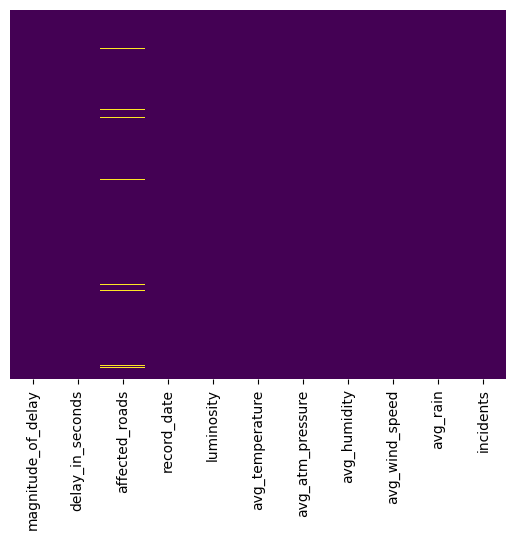

In [64]:
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

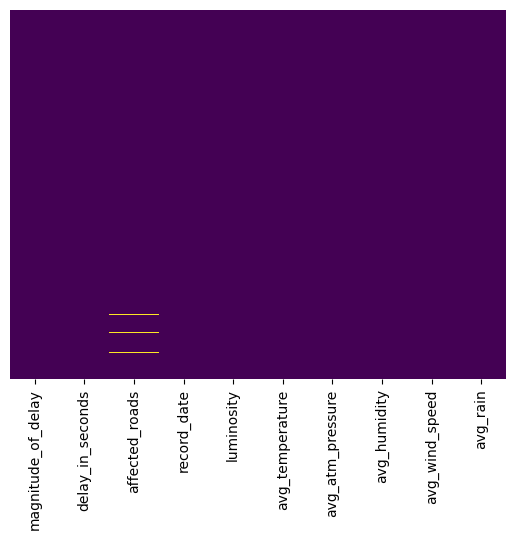

In [65]:
sns.heatmap(test_data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [66]:
i = 0
data_roads = data2.copy()

#print(data2['affected_roads']).head(30)
all_roads = {}
for road_list in data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads and road != "":
                    all_roads[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            data_roads.at[i, 'affected_roads'] = dic.keys()
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads))
print("Estradas :: ", all_roads.keys())


i = 0

test_data_roads = test_data2.copy()

#print(data2['affected_roads']).head(30)
all_roads_test = {}
for road_list in test_data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        test_data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads_test and road != "":
                    all_roads_test[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            test_data_roads.at[i, 'affected_roads'] = dic.keys()
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads_test))
print("Estradas :: ", all_roads_test.keys())



Nº de estradas ::  10
Estradas ::  dict_keys(['N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310', 'N207-4', 'IC5 - N206', 'EM579'])
Nº de estradas ::  10
Estradas ::  dict_keys(['N101', 'R206', 'N105', 'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4'])


In [67]:
data_roads.head(30)

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,(N101),2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"(N101, R206, N105)",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,(N101),2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,(N101),2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,(N101),2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low
7,UNDEFINED,0,(N101),2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,Sem Chuva,High
8,UNDEFINED,1368,(N101),2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,Sem Chuva,Very_High
9,MAJOR,10431,"(N101, N206, N105, N309, IC5)",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,Sem Chuva,Very_High


In [68]:
all_roads_list = sorted(all_roads.keys())

for road in all_roads_list:
    data_roads[road] = 0

data_roads['others'] = 0

all_roads_test_list = sorted(all_roads.keys())
for road in all_roads_test_list:
    if road in all_roads_list:
        test_data_roads[road] = 0

test_data_roads['others'] = 0
#data2.head(30)

In [69]:
test_data_roads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  1206 non-null   object 
 1   delay_in_seconds    1206 non-null   int64  
 2   affected_roads      1206 non-null   object 
 3   record_date         1206 non-null   object 
 4   luminosity          1206 non-null   object 
 5   avg_temperature     1206 non-null   float64
 6   avg_atm_pressure    1206 non-null   float64
 7   avg_humidity        1206 non-null   float64
 8   avg_wind_speed      1206 non-null   float64
 9   avg_rain            1206 non-null   object 
 10  EM579               1206 non-null   int64  
 11  IC5                 1206 non-null   int64  
 12  IC5 - N206          1206 non-null   int64  
 13  N101                1206 non-null   int64  
 14  N105                1206 non-null   int64  
 15  N206                1206 non-null   int64  
 16  N207-4

In [70]:
data_roads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   object 
 11  EM579               5000 non-null   int64  
 12  IC5                 5000 non-null   int64  
 13  IC5 - N206          5000 non-null   int64  
 14  N101                5000 non-null   int64  
 15  N105                5000 non-null   int64  
 16  N206  

In [71]:
i = 0
for reg in data_roads:
    list = data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            data_roads.at[i, road] = 1
    i = i + 1


i = 0
for reg in test_data_roads:
    list = test_data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            if road not in all_roads.keys():
                test_data_roads.at[i,'others'] = 1
            else:
                test_data_roads.at[i, road] = 1
    i = i + 1

In [72]:
print(test_data_roads.columns)

Index(['magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'EM579', 'IC5',
       'IC5 - N206', 'N101', 'N105', 'N206', 'N207-4', 'N309', 'N310', 'R206',
       'others'],
      dtype='object')


<AxesSubplot:>

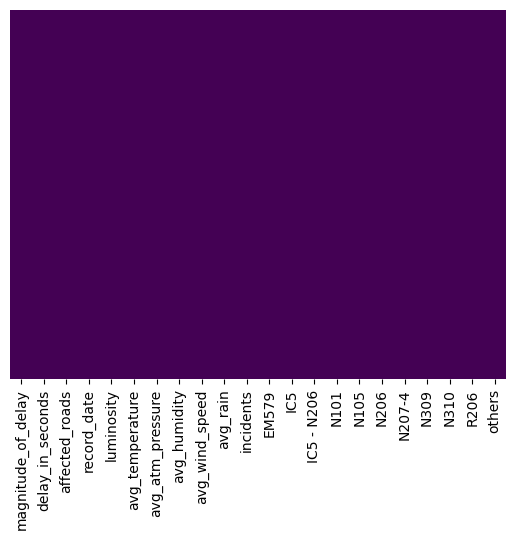

In [73]:
data3 = data_roads.dropna()
sns.heatmap(data_roads.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [74]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,IC5,IC5 - N206,N101,N105,N206,N207-4,N309,N310,R206,others
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,(N101),2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,...,0,0,1,0,0,0,0,0,0,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,"(N101, R206, N105)",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,...,0,0,1,1,0,0,0,0,1,0
4,UNDEFINED,0,(N101),2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,...,0,0,1,0,0,0,0,0,0,0


Como podemos ver, agora o tipo do feature Incidents é numérico

In [75]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   int64  
 11  EM579               5000 non-null   int64  
 12  IC5                 5000 non-null   int64  
 13  IC5 - N206          5000 non-null   int64  
 14  N101                5000 non-null   int64  
 15  N105                5000 non-null   int64  
 16  N206  

Agora vamos tratar das datas

In [76]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [77]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

test_data_roads['record_date'] = pd.to_datetime(test_data_roads['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')

In [78]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute

test_data_roads['record_date_year'] = test_data_roads['record_date'].dt.year
test_data_roads['record_date_month'] = test_data_roads['record_date'].dt.month
test_data_roads['record_date_day'] = test_data_roads['record_date'].dt.day
test_data_roads['record_date_hour'] = test_data_roads['record_date'].dt.hour
test_data_roads['record_date_minute'] = test_data_roads['record_date'].dt.minute


data4.head()
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N207-4,N309,N310,R206,others,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,1211,(N101),2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,4,13,19,0
1,UNDEFINED,0,(N101),2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,...,0,0,0,0,0,2021,10,13,4,0
2,UNDEFINED,0,(N101),2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,7,18,19,0
3,UNDEFINED,140,"(N101, R206)",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,...,0,0,0,1,0,2021,10,30,15,0
4,UNDEFINED,0,(N101),2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,10,18,10,0


In [79]:
#data4.nunique()

Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [85]:
data5 = data4.drop(['record_date_minute','record_date_year','affected_roads'], axis = 1)
test_data3 = test_data_roads.drop(['record_date_minute','record_date_year','affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
data5.info()
test_data3.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  5000 non-null   object        
 1   delay_in_seconds    5000 non-null   int64         
 2   record_date         5000 non-null   datetime64[ns]
 3   luminosity          5000 non-null   object        
 4   avg_temperature     5000 non-null   float64       
 5   avg_atm_pressure    5000 non-null   float64       
 6   avg_humidity        5000 non-null   float64       
 7   avg_wind_speed      5000 non-null   float64       
 8   avg_rain            5000 non-null   object        
 9   incidents           5000 non-null   int64         
 10  EM579               5000 non-null   int64         
 11  IC5                 5000 non-null   int

A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [81]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [83]:
data6 = encode_and_bind(data5, 'magnitude_of_delay')
data6.drop('magnitude_of_delay',axis=1, inplace=True)

data7 = encode_and_bind(data6, 'luminosity')
data7.drop('luminosity',axis=1, inplace=True)

data8 = encode_and_bind(data7, 'avg_rain')
data8.drop('avg_rain', axis=1, inplace=True)

test_data4 = encode_and_bind(test_data3, 'magnitude_of_delay')
test_data4.drop('magnitude_of_delay',axis=1, inplace=True)

test_data5 = encode_and_bind(test_data4, 'luminosity')
test_data5.drop('luminosity',axis=1, inplace=True)

test_data6 = encode_and_bind(test_data5, 'avg_rain')
test_data6.drop('avg_rain',axis=1, inplace=True)

data_ohe = data8
data_ohe.head()

test_ohe = test_data6

Introduzir as estações do ano como uma feature

In [ ]:
data7 = data6
data7['season'] = 0
test_data5 = test_data4
test_data5['season'] = 0

for i in data7.index:
    if data7.at[i, 'record_date_month'] in [1, 2,3]:
        data7.at[i, 'season'] = 1 # Winter
    elif data7.at[i, 'record_date_month'] in [4, 5, 6]:
        data7.at[i, 'season'] = 2 # Spring
    elif data7.at[i, 'record_date_month'] in [7, 8, 9]:
        data7.at[i, 'season'] = 3 # Summer
    elif data7.at[i, 'record_date_month'] in [10, 11, 12]:
        data7.at[i, 'season'] = 4 # Fall

for i in test_data5.index:
    if test_data5.at[i, 'record_date_month'] in [1, 2,3]:
        test_data5.at[i, 'season'] = 1 # Winter
    elif test_data5.at[i, 'record_date_month'] in [4, 5, 6]:
        test_data5.at[i, 'season'] = 2 # Spring
    elif test_data5.at[i, 'record_date_month'] in [7, 8, 9]:
        test_data5.at[i, 'season'] = 3 # Summer
    elif test_data5.at[i, 'record_date_month'] in [10, 11, 12]:
        test_data5.at[i, 'season'] = 4 # Fall

Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo.

In [84]:
data8 = data_ohe
data8['date_offset'] = (data8['record_date'].dt.month*100 + data8['record_date'].dt.day - 320)%1300

data8['season'] = pd.cut(data8['date_offset'], [0, 300, 602, 900, 1300], 
                      labels = ['spring', 'summer', 'autumn', 'winter'], include_lowest=True)
data8.drop(['date_offset', 'record_date'], axis = 1, inplace=True)
replace_map = { 'season' : {'spring': 1, 'summer': 2, 'autumn': 3, 'winter' : 4}}
data9 = data8.replace(replace_map)
data9['season'] = data9['season'].astype(int)

data_season = data9


test_data6 = test_ohe
test_data6['date_offset'] = (test_data6['record_date'].dt.month*100 + test_data6['record_date'].dt.day - 320)%1300

test_data6['season'] = pd.cut(test_data6['date_offset'], [0, 300, 602, 900, 1300], 
                      labels = ['spring', 'summer', 'autumn', 'winter'], include_lowest=True)
test_data6.drop(['date_offset', 'record_date'], axis = 1, inplace=True)
replace_map = { 'season' : {'spring': 1, 'summer': 2, 'autumn': 3, 'winter' : 4}}
test_data6 = test_data6.replace(replace_map)
test_data6['season'] = test_data6['season'].astype(int)

test_season = test_data6
test_season.head()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,EM579,IC5,IC5 - N206,N101,N105,...,record_date_month,record_date_day,record_date_hour,magnitude_of_delay_MAJOR,magnitude_of_delay_MODERATE,magnitude_of_delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT,season
0,1211,15.0,1018.0,80.0,0.0,0,0,0,1,0,...,4,13,19,0,0,1,0,1,0,1
1,0,16.0,1018.0,41.0,2.0,0,0,0,1,0,...,10,13,4,0,0,1,1,0,0,3
2,0,22.0,1017.0,71.0,0.0,0,0,0,1,0,...,7,18,19,0,0,1,0,1,0,2
3,140,18.0,1008.0,81.0,3.0,0,0,0,1,0,...,10,30,15,0,0,1,0,1,0,3
4,0,20.0,1022.0,86.0,0.0,0,0,0,1,0,...,10,18,10,0,0,1,0,1,0,3


In [50]:
df = data_season
df_test = test_data6

train_data_x = df.drop('incidents', axis=1)
train_label_y = df['incidents']
test_data_x = df_test
df.head()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,incidents,EM579,IC5,IC5 - N206,N101,...,magnitude_of_delay_MODERATE,magnitude_of_delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT,avg_rain_Sem Chuva,avg_rain_chuva forte,avg_rain_chuva fraca,avg_rain_chuva moderada,season
0,0,12.0,1013.0,70.0,1.0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,4
1,385,12.0,1007.0,91.0,1.0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,4
2,69,14.0,1025.0,64.0,0.0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,4
3,2297,15.0,1028.0,75.0,1.0,4,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3
4,0,27.0,1020.0,52.0,1.0,3,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
df.to_csv("dataset2.csv", header=None, index=None, sep=';', mode='a')

In [ ]:
df.head()

In [ ]:
corr_matrix = data9.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2022)

In [ ]:
clf.fit(X, y)

In [ ]:
predictions_dt = clf.predict(X_test)
predictions_dt

In [ ]:
#replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

outcome = []
for i in range(len(predictions_dt)):
    if predictions_dt[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions_dt[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions_dt[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions_dt[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions_dt[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("out_file.csv", index=False,header=True)

## Random Forest

In [29]:
#df = data9

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [51]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [200, 250]
max_features = ['auto', 'sqrt',None]
max_depth = [10,15,18]
min_samples_split = [1,2]
min_samples_leaf = [1,2]
bootstrap = [True, False]
criterion = ['entropy']


param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap,
              'criterion' : criterion}
print(param_grid)

{'n_estimators': [200, 250], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 15, 18], 'min_samples_split': [1, 2], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['entropy']}


In [52]:
rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

#predictions = rf.predict(X_Test)
#predictions

#from sklearn.metrics import accuracy_score
#rf.score(X_train, y_train)



In [53]:
from sklearn.model_selection import GridSearchCV
rf_GridSearch = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 10, verbose = 2 , n_jobs = 4)

In [54]:
rf_GridSearch = rf_GridSearch.fit(train_data_x, train_label_y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.1s
[CV] 

/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch

In [55]:
rf_GridSearch.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [56]:
predictions = rf_GridSearch.predict(test_data_x)
predictions

/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- avg_rain_Sem Chuva
- avg_rain_chuva forte
- avg_rain_chuva fraca
- avg_rain_chuva moderada

  warnings.warn(message, FutureWarning)


ValueError: X has 26 features, but RandomForestClassifier is expecting 30 features as input.

In [ ]:
predictions = rf_GridSearch.predict(X_train)
predictions

In [44]:
print (f'Train Accuracy - : {rf_GridSearch.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_GridSearch.score(X_Test,y_test):.3f}')#

Train Accuracy - : 1.000
Test Accuracy - : 0.927


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9266666666666666

In [ ]:
outcome = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("random_forest_grid_search_out.csv", index=False,header=True)